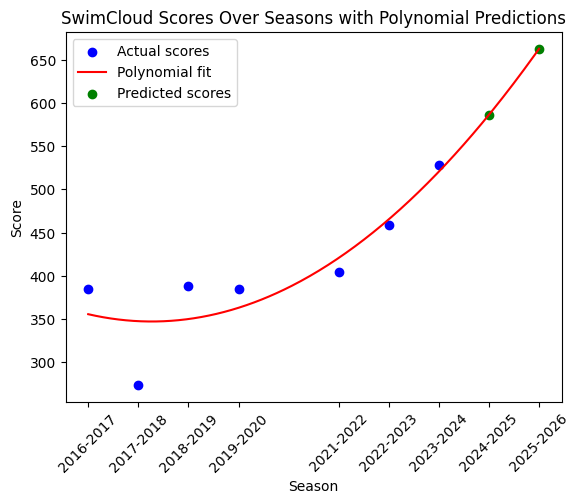

Predicted score for season 2024-2025: 586.66
Predicted score for season 2025-2026: 663.14


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the data points
seasons = ["2016-2017", "2017-2018", "2018-2019", "2019-2020", "2021-2022", "2022-2023", "2023-2024"]
scores = [384.2, 273.69, 388.55, 384.53, 404.4, 458.3, 528.65]

# Convert seasons to numerical values for fitting the model
years = np.array([2017, 2018, 2019, 2020, 2022, 2023, 2024]).reshape(-1, 1)

# Create a DataFrame
data = pd.DataFrame({'Year': years.flatten(), 'Score': scores})

# Polynomial Regression
poly = PolynomialFeatures(degree=2)  # Adjust the degree if needed
X_poly = poly.fit_transform(years)
model = LinearRegression()
model.fit(X_poly, scores)

# Predict the next two seasons' scores (2025, 2026)
future_years = np.array([2025, 2026]).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
predictions = model.predict(future_years_poly)

# Prepare for plotting
all_years = np.concatenate([years, future_years])
all_scores = np.concatenate([scores, predictions])

# Plot the data and the polynomial regression line
plt.scatter(data['Year'], data['Score'], color='blue', label='Actual scores')

# Generate a smooth curve for the polynomial fit
year_range = np.linspace(2017, 2026, 300).reshape(-1, 1)
year_range_poly = poly.transform(year_range)
predicted_range = model.predict(year_range_poly)

plt.plot(year_range.flatten(), predicted_range, color='red', label='Polynomial fit')
plt.scatter(future_years.flatten(), predictions, color='green', label='Predicted scores')

# Adjust x-axis labels to show full season
season_labels = ["2016-2017", "2017-2018", "2018-2019", "2019-2020", "2021-2022", "2022-2023", "2023-2024", "2024-2025", "2025-2026"]
plt.xticks(np.append(years.flatten(), future_years.flatten()), season_labels, rotation=45)
plt.xlabel('Season')
plt.ylabel('Score')
plt.title('SwimCloud Scores Over Seasons with Polynomial Predictions')
plt.legend()
plt.show()

# Print the predictions
for season, score in zip(["2024-2025", "2025-2026"], predictions):
    print(f"Predicted score for season {season}: {score:.2f}")
